# Проект урока 7. Работа с грязными данными

Для выполнения этого проекта скачайте Jupyter-ноутбук с описанием заданий отсюда. Загрузите его в JupyterHub. Откройте ноутбук и выполняйте задания в нём. Код вы будете писать в ноутбуке, а сдавать решения на проверку — в LMS.

## Часть 1. Объединение данных о покупках из папок

## Шаг 1

**Описание**

На этот раз данные имеют следующую структуру:

* данные записываются для каждого пользователя, совершившего покупки, каждый день
* для каждой даты есть своя папка, внутри неё — папки для каждого пользователя
* внутри каждой папки пользователя есть файл `data.csv`, где и хранятся данные

Схематично это выглядит так:

```
└── data
   ├── 2020-12-30
   │  ├── FirstName_LastName1
   │  │   └── data.csv
   │  ├── FirstName_LastName2
   │  │   └── data.csv
   │  └── FirstName_LastName3
   │      └── data.csv
   └── 2020-12-31
      ├── FirstName_LastName1
      │   └── data.csv
      └── FirstName_LastName5
          └── data.csv
```

Например, 30 декабря 2020 года три покупателя сделали покупки, 31 — два (папки 2020-12-30 и 2020-12-31 соответственно). 

Поскольку клиент `FirstName_LastName1` купил товары в оба дня, для него имеется папка в папке для каждой из дат. Для других клиентов — по одной.

**Примечание**: данные в задании покрывают другой временной период, имена тоже другие. Подробности, примеры и возможные подсказки можно найти в текстах следующих шагов.

**Задачи**
1. Соберите все данные из папки `data` в один датафрэйм, имеющий следующие столбцы: колонки из самих файлов (`product_id`, `quantity`), а также имя пользователя (`name`), и дата этих покупок (`date`), соответствующие названию папок, где лежит файл.
2. Выясните, какой пользователь купил больше всего товаров. Если их несколько, то перечислите имена через запятую с пробелом и в алфавитном порядке.
3. Найдите топ-10 товаров по числу проданных единиц за всё время и постройте барплот. Сколько было продано единиц товара с `product_id==56`?
4. Визуализируйте продажи по дням.
5. Сколько пользователей приобрели какой-либо товар повторно (более 1 раза)? Повтором будем считать покупку товара с одинаковым `product_id`, совершенную в разные дни. 

Найти данные можно либо на JupyterHub, либо скачать архив [отсюда](https://yadi.sk/d/fkzS9UYSr59EQQ).


Вы можете решать задания тем способом, который считаете наиболее удобным или оптимальным. А для того, чтобы лучше понять задание, следуйте по шагам выполнения. Бывает, что их можно выполнить в одну строчку, применяя методы друг за другом. А если выполняете шаги отдельно, не забудьте сохранить результат в переменную, чтобы в следующем шаге работать именно с ней.

В ноутбуке место для вашего решения обозначено комментарием `# Ваш код здесь`, но вы можете писать код там, где вам удобно, добавлять или удалять ячейки с кодом или текстом по вашему усмотрению.

Кроме того можно посмотреть подсказки, кликнув на строчку `► Нажмите сюда, чтобы увидеть подсказку`. Также не забывайте о наличии конспектов и возможности задать вопрос в `Discord`, ссылка на нужный тред есть на странице каждого шага в LMS.

### Шаг 2

Соберите все данные из папки `data` в один датафрэйм, имеющий следующие столбцы: колонки из самих файлов (`product_id`, `quantity`), а также имя пользователя (`name`), дата этих покупок (`date`), соответствующие названию папок, где лежит файл.

Пример итоговой таблицы:

|#|product_id|quantity|name|date|                                                                                     
|:-|:----|:-----|:--|:-----|                                              
|0|56|2|Anatoly_Karpov|2020-12-30|
|1|7|2|Anatoly_Karpov|2020-12-30|
|2|9|3|Anatoly_Karpov|2020-12-30|

Для объединения датафреймов, читаемых из файлов, можно использовать метод `pd.concat()`. Например:

1. Имеются следующие данные:

```python
> df_1
```

|#|product_id|quantity|name|date|                                                                                     
|:-|:----|:-----|:--|:-----|                                              
|0|56|2|Anatoly_Karpov|2020-12-30|
|1|7|2|Anatoly_Karpov|2020-12-30|
|2|9|3|Anatoly_Karpov|2020-12-30|

```python
> df_2
```

|#|product_id|quantity|name|date|                                                                                     
|:-|:----|:-----|:--|:-----|                                              
|0|4|2|Кatya_Skriptsova|2020-12-30|
|1|71|1|Кatya_Skriptsova|2020-12-31|

2. Соединяем, передав `pd.concat` на вход список датафреймов, которые нужно объединить. Обратите внимание: индексы повторяются, поэтому после соединения всех данных нужно их сбросить.

```python
> df = pd.concat([df_1, df_2])
> df
```
|#|product_id|quantity|name|date|                                                                                     
|:-|:----|:-----|:--|:-----|                                              
|0|56|2|Anatoly_Karpov|2020-12-30|
|1|7|2|Anatoly_Karpov|2020-12-30|
|2|9|3|Anatoly_Karpov|2020-12-30|
|0|4|2|Кatya_Skriptsova|2020-12-30|
|1|71|1|Кatya_Skriptsova|2020-12-31|



**Рекомендуем решать данное задание через `os.walk()`.**

**В качестве ответа укажите сумму по колонке `quantity`.**

In [2]:
import os
way = 'data'


In [3]:
for el in os.walk(way):
    print(el)

('data', ['2020-12-03', '2020-12-04', '2020-12-05', '2020-12-06', '2020-12-07', '2020-12-08', '2020-12-09'], [])
('data\\2020-12-03', ['Alexey_Smirnov', 'Anton_Petrov', 'Kirill_Petrov', 'Petr_Fedorov', 'Vasiliy_Ivanov', 'Vasiliy_Petrov'], [])
('data\\2020-12-03\\Alexey_Smirnov', [], ['data.csv'])
('data\\2020-12-03\\Anton_Petrov', [], ['data.csv'])
('data\\2020-12-03\\Kirill_Petrov', [], ['data.csv'])
('data\\2020-12-03\\Petr_Fedorov', [], ['data.csv'])
('data\\2020-12-03\\Vasiliy_Ivanov', [], ['data.csv'])
('data\\2020-12-03\\Vasiliy_Petrov', [], ['data.csv'])
('data\\2020-12-04', ['Alexey_Smirnov', 'Kirill_Fedorov', 'Petr_Fedorov', 'Petr_Ivanov', 'Petr_Smirnov', 'Rostislav_Fedorov', 'Rostislav_Ivanov', 'Rostislav_Smirnov', 'Vasiliy_Ivanov'], [])
('data\\2020-12-04\\Alexey_Smirnov', [], ['data.csv'])
('data\\2020-12-04\\Kirill_Fedorov', [], ['data.csv'])
('data\\2020-12-04\\Petr_Fedorov', [], ['data.csv'])
('data\\2020-12-04\\Petr_Ivanov', [], ['data.csv'])
('data\\2020-12-04\\Petr_Sm

In [4]:
import pandas as pd

df = pd.DataFrame()

for path in os.walk(way):
    if ['data.csv'] in path:
        full_path = path[0]+'\\'+'data.csv'
        name = full_path[4:].split('\\')[2]
        date = full_path[4:].split('\\')[1]
    
        df_p = pd.read_csv(full_path)
        df_p['name'] = name
        df_p['date'] = date
        
        df = pd.concat([df, df_p])
df = df[['product_id', 'quantity', 'name', 'date']]
df

,product_id,quantity,name,date
0,47,1,Alexey_Smirnov,2020-12-03
1,57,1,Alexey_Smirnov,2020-12-03
2,14,2,Alexey_Smirnov,2020-12-03
3,52,1,Alexey_Smirnov,2020-12-03
4,1,4,Alexey_Smirnov,2020-12-03
...,...,...,...,...
1,66,4,Rostislav_Petrov,2020-12-09
2,39,2,Rostislav_Petrov,2020-12-09
0,82,4,Vasiliy_Ivanov,2020-12-09
1,74,2,Vasiliy_Ivanov,2020-12-09


In [5]:
df.quantity.sum()



480

### Шаг 3

Выясните, какой пользователь купил больше всего товаров. Если их несколько, то перечислите имена через запятую с пробелом и в алфавитном порядке. Например:

```python
Anatoly_Karpov, Nekto_Ktotovich, Lena_Uhanova, Ignat, Sasha_Tokarev
```

In [6]:
df\
    .groupby('name', as_index=False)\
    .agg({'quantity':'sum'})\
    .sort_values('quantity', ascending=False)

,name,quantity
3,Alexey_Smirnov,52
13,Petr_Smirnov,52
6,Anton_Smirnov,45
10,Petr_Fedorov,34
7,Kirill_Fedorov,28
16,Rostislav_Petrov,28
19,Vasiliy_Ivanov,27
0,Alexey_Fedorov,24
4,Anton_Ivanov,23
11,Petr_Ivanov,21


### Шаг 4

Найдите топ-10 товаров по числу проданных единиц за всё время и постройте барплот (столбчатую диаграмму, `sns.barplot`), где:

* по оси x — идентификаторы товаров (`product_id`) 
* по оси y — суммарное число их покупок (сколько товаров с таким `product_id` было продано)

Для практики попробуйте изменить параметры графика, например: цвет (`color`), сортировку значений по оси х (`order`). 

В качестве ответа укажите, сколько было продано единиц товара с `product_id` равным `56`.

In [7]:
res = df\
    .groupby('product_id', as_index=False)\
    .agg({'quantity':'sum'})\
    .sort_values('quantity', ascending=False)\
    .head(10)
res 

,product_id,quantity
22,27,20
42,56,18
21,24,15
51,74,15
32,41,14
27,34,13
66,94,13
46,66,13
65,92,12
38,50,12


<AxesSubplot:xlabel='product_id', ylabel='quantity'>

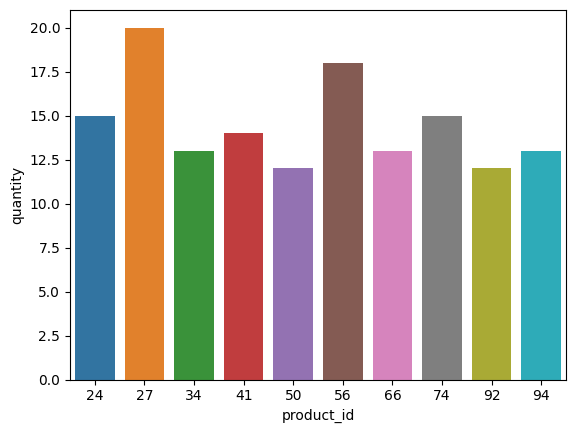

In [8]:
import seaborn as sns
sns.barplot(data=res, x='product_id', y='quantity')

### Шаг 5

Посмотрим на продажи по дням! Для визуализации снова используйте барплот, только теперь по оси `x` будут дни, по которым у нас есть данные (`date`). 

Далее выберите верные утверждения:

* Меньше всего товаров было приобретено 6 декабря
* 5 декабря было куплено почти в три раза меньше товаров, чем в предыдущий день
* 8 и 9 декабря было продано примерно одинаковое число товаров
* Максимальное число товаров было продано 4 декабря
* Меньше всего продуктов было приобретено 4 декабря
* 4 декабря было куплено почти в два раза больше товаров, чем в предыдущий день
* 5 декабря было куплено почти в два раза больше товаров, чем в предыдущий день
* 7 декабря было куплено почти в два раза больше товаров, чем в предыдущий день

In [9]:
res = df\
    .groupby('date', as_index=False)\
    .agg({'quantity':'sum'})\
    .sort_values('date')\
    .head(10)
res 

,date,quantity
0,2020-12-03,60
1,2020-12-04,113
2,2020-12-05,61
3,2020-12-06,15
4,2020-12-07,94
5,2020-12-08,68
6,2020-12-09,69


<AxesSubplot:xlabel='date', ylabel='quantity'>

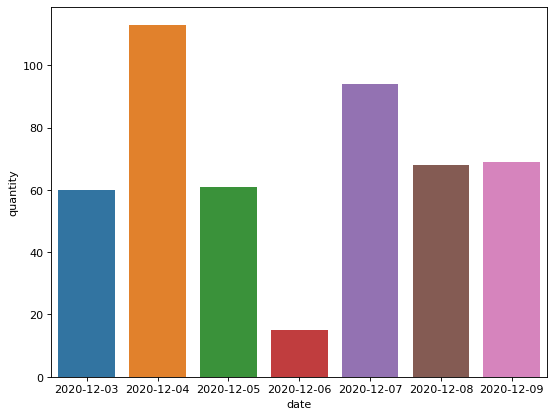

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6), dpi=80)

sns.barplot(data=res, x='date', y='quantity')

### Шаг 6

Сколько пользователей приобрели какой-либо товар повторно (более 1 раза)? Повтором будем считать покупку товара с одинаковым `product_id`, совершенную в разные дни. 

Например, пользователь `Sasha Tsarev` дважды приобрел товар `6`. Поскольку покупка была совершена в один и тот же день, повторной в данном случае она считаться не будет. 

`Katya Skriptsova` также сделала две покупки товара `7`, но в разные дни, поэтому этот случай засчитывается.

|product_id|quantity|name|date|                                                                                     
|:----|:-----|:--|:-----|                                              
|25|2|Кatya_Skriptsova|2020-12-05|
|54|1|Olya_Silyutina|2020-12-05|
|7|4|Кatya_Skriptsova|2020-12-05|
|6|4|Sasha_Tsarev|2020-12-06|
|6|1|Sasha_Tsarev|2020-12-06|
|7|5|Кatya_Skriptsova|2020-12-06|

Может пригодиться: `.drop_duplicates()`

In [11]:
df.drop_duplicates(subset=['name', 'product_id', 'date']).groupby(['name', 'product_id']).agg({'product_id':'count'}).query('product_id > 1')


,,product_id
name,product_id,
Anton_Ivanov,15,2
Petr_Fedorov,94,2


## Часть 2. Геном мухи и работа с нестандартным форматом данных

В данном проекте вы поработаете с довольно нетипичными для аналитика данными: `gff файлом`, который описывает геном мухи (описание формата можно найти [здесь](http://gmod.org/wiki/GFF3)). 

При его выполнении вам может понадобиться часть конспекта про работу с регулярными выражениями и со строковыми данными.

**Задачи**:

* выделите из колонки `attributes` значение атрибута `Parent`, то есть если там записано `Parent=x,`, `something;Parent=x` или `Parent=x;something`, то нам нужен только `x`
* выясните, какое из этих значений является самым частым
* постройте распределение встречаемости значений в столбце `type`

Данные можно достать с JupyterHub из папке `7_gff` (`'...shared/homeworks/python_ds_miniprojects/7_gff'`) , либо [отсюда](https://stepik.org/media/attachments/course/72204/gff.tsv).

### Шаг 8

Какое значение атрибута `Parent` самое частое?

Вам необходимо извлечь из колонки `attributes` значение атрибута `Parent` для каждой строки и найти самый частый.

In [17]:
df = pd.read_csv('gff.tsv', sep='\t')
df

,seq_id,source,type,start,end,score,strand,phase,attributes
0,chr17,RefSeq,exon,6811330,6811453,.,+,.,Parent=XM_001475631.1
1,chr17,RefSeq,CDS,6808204,6808245,.,+,0,Name=CDS:NC_000083.5:LOC100040603;Parent=XM_00...
2,chr17,RefSeq,CDS,6811792,6811869,.,+,2,Name=CDS:NC_000083.5:LOC100040603;Parent=XM_00...
3,chr17,RefSeq,exon,6806513,6806553,.,+,.,Parent=XM_001475631.1
4,chr17,RefSeq,five_prime_UTR,6806513,6806526,.,+,.,Parent=XM_001475631.1
...,...,...,...,...,...,...,...,...,...
507,chr17,RefSeq,exon,6812219,6818159,.,+,.,Parent=XM_001475631.1
508,chr17,RefSeq,protein,6806527,6812289,.,+,.,ID=;Parent=XM_001475631.1
509,chr17,RefSeq,CDS,6806527,6806553,.,+,0,Name=CDS:NC_000083.5:LOC100040603;Parent=XM_00...
510,chr17,RefSeq,exon,6811792,6811869,.,+,.,Parent=XM_001475631.1


In [18]:
df_att_lst = df.attributes.to_list()

In [19]:
new_att = []
for att in df_att_lst:
    att_split = att.split(';')
    for el in att_split:
        if 'Parent=' in el:
            res = el.split('Parent=')[1]
            new_att.append(res)
            
new_att = pd.Series(new_att)

In [20]:
df['attributes'] = new_att
df.attributes.value_counts()

XM_001475631.1              309
XM_001475631.1,             170
NC_000083.5:LOC100040603     33
Name: attributes, dtype: int64

### Шаг 9

Постройте распределение встречаемости значений в колонке `type`.

Какое самое частое значение в колонке `type`?

* exon
* CDS
* five_prime_UTR
* mRNA
* protein
* three_prime_UTR

In [28]:
res = pd.DataFrame(df['type'].value_counts()).reset_index()
res

,index,type
0,exon,201
1,CDS,170
2,five_prime_UTR,47
3,mRNA,33
4,three_prime_UTR,32
5,protein,29


<AxesSubplot:xlabel='index', ylabel='type'>

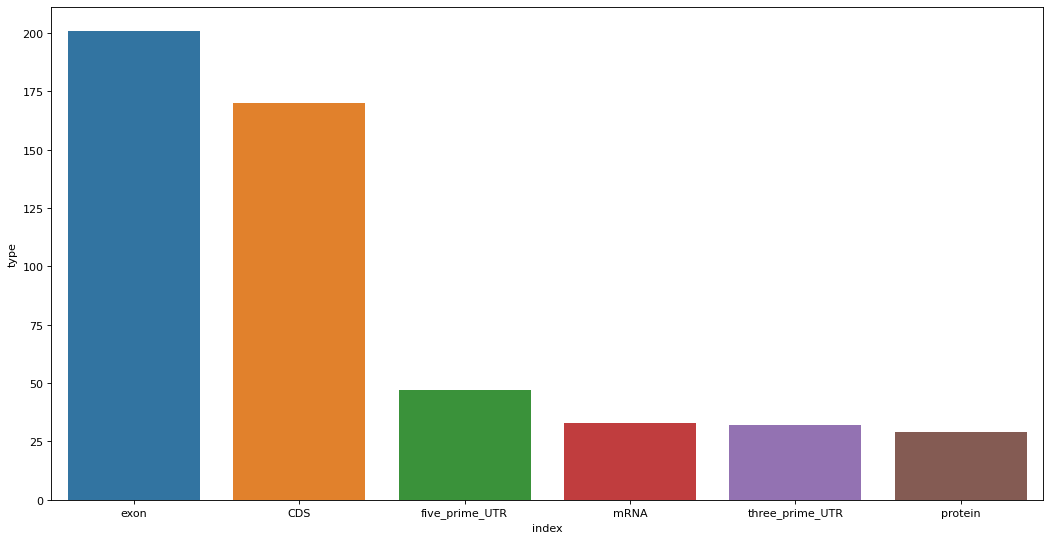

In [31]:
plt.figure(figsize=[16, 8], dpi=80)
sns.barplot(data=res, x='index', y='type')